In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

Note we have 7 files from the competetition hosts: 
- Game Data: games.csv, the data for each game (season, date & time, location, home and visitor teams), key variable is `gameID`.
- PFF Scouting Data: PFFScoutingData.csv, "play-level scouting information for each game", key variables are `gameID` and `playID` (note `nflID` not included). Information about kick types, directions, and air time throughout the game.
- Player Data: players.csv, information for each player (height, weight, birth, college, position, name), key variable is `nflID` (Does not include `gameID` and `playID`).
- Play Data: plays.csv, "play-level information from each game", key variables are `gameID` and `playID`. Game-specific temporal information, type of play and play result. `kickerId` is `nflId` of kicker.
- Tracking Data: tracking2018.csv, tracking 2019.csv, and tracking2020.csv. Each contains "player tracking data" from the indicated season, key variables are `gameID`, `nflID`, and `playID`. Each player's position on the field as well as the football for all special teams plays per game.
We also have a weather dataset from ThomasJBliss.

In [2]:
games = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/games.csv")

scout = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/PFFScoutingData.csv")

players = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/players.csv")

play = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/plays.csv")

#track18 = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2018.csv")
#track19 = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2019.csv")
#track20 = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2020.csv")

g_weather = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/WeatherData/data/games_weather.csv")
game_ident = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/WeatherData/data/games.csv")
stadium_ident = pd.read_csv("/../../../NFL_Big_Data_Bowl_2022/WeatherData/data/stadium_coordinates.csv")


Weather data needs to be combined into three datasets, one per year.

In [3]:
def get_weather_data():
    # Pull down datasets
    
    # Merge game and weather data on game_id
    g_weather_merge = pd.merge(g_weather, game_ident, on='game_id')

    # Merge stadium data on StadiumName
    final_df = pd.merge(g_weather_merge, stadium_ident, on='StadiumName')

    # Convert time columns to datetime objects
    time_cols = ['TimeMeasure', 'TimeStartGame', 'TimeEndGame']

    for col in time_cols:
        final_df[col] = pd.to_datetime(final_df[col], format='%m/%d/%Y %H:%M')

    # Create sliced DataFrames
    weather2018 = final_df[final_df['TimeMeasure'].dt.year == 2018]
    weather2019 = final_df[final_df['TimeMeasure'].dt.year == 2019]
    weather2020 = final_df[final_df['TimeMeasure'].dt.year == 2020]

    return weather2018, weather2019, weather2020

In [4]:
weather2018, weather2019, weather2020 = get_weather_data()

In [7]:
weather2018

,game_id,Source,DistanceToStation,TimeMeasure,Temperature,DewPoint,Humidity,Precipitation,WindSpeed,WindDirection,...,Season,StadiumName,TimeStartGame,TimeEndGame,TZOffset,HomeTeam,RoofType,Longitude,Latitude,StadiumAzimuthAngle
3099,2018091608,Meteostat,3.98,2018-09-16 12:00:00,75.56,68.90,80.0,0.0,10.31,90.0,...,2018,FedExField,2018-09-16 13:00:00,2018-09-16 15:53:00,-4,WAS,Outdoor,-76.864444,38.907778,295.0
3100,2018091608,Meteostat,3.98,2018-09-16 13:00:00,75.92,68.54,78.0,0.0,8.08,40.0,...,2018,FedExField,2018-09-16 13:00:00,2018-09-16 15:53:00,-4,WAS,Outdoor,-76.864444,38.907778,295.0
3101,2018091608,Meteostat,3.98,2018-09-16 14:00:00,77.72,69.62,76.0,0.0,9.20,30.0,...,2018,FedExField,2018-09-16 13:00:00,2018-09-16 15:53:00,-4,WAS,Outdoor,-76.864444,38.907778,295.0
3102,2018091608,Meteostat,3.98,2018-09-16 15:00:00,78.80,69.44,73.0,0.0,9.20,70.0,...,2018,FedExField,2018-09-16 13:00:00,2018-09-16 15:53:00,-4,WAS,Outdoor,-76.864444,38.907778,295.0
3103,2018091608,Meteostat,3.98,2018-09-16 16:00:00,80.24,69.62,70.0,0.0,12.74,100.0,...,2018,FedExField,2018-09-16 13:00:00,2018-09-16 15:53:00,-4,WAS,Outdoor,-76.864444,38.907778,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39067,2018121600,Meteostat,4.47,2018-12-16 14:00:00,51.98,46.94,83.0,0.0,6.96,310.0,...,2018,Mercedes-Benz Stadium,2018-12-16 13:00:00,2018-12-16 16:07:00,-5,ATL,Retractable,-84.400000,33.755556,70.9
39068,2018121600,Meteostat,4.47,2018-12-16 15:00:00,53.06,44.96,74.0,0.0,5.84,310.0,...,2018,Mercedes-Benz Stadium,2018-12-16 13:00:00,2018-12-16 16:07:00,-5,ATL,Retractable,-84.400000,33.755556,70.9
39069,2018121600,Meteostat,4.47,2018-12-16 16:00:00,53.06,46.04,77.0,0.0,9.20,310.0,...,2018,Mercedes-Benz Stadium,2018-12-16 13:00:00,2018-12-16 16:07:00,-5,ATL,Retractable,-84.400000,33.755556,70.9
39070,2018121600,Meteostat,4.47,2018-12-16 17:00:00,53.06,46.04,77.0,0.0,14.98,310.0,...,2018,Mercedes-Benz Stadium,2018-12-16 13:00:00,2018-12-16 16:07:00,-5,ATL,Retractable,-84.400000,33.755556,70.9


We need to standardize the height of all players. Inches will be easier to code with, so we first define a function `ft_in` to convert all heights from ft-in to inches. It also takes inches to an `int`. Then we will apply it to the `height` column of our dataframe.

In [4]:
def ft_in(x):
    if '-' in x:
        meas=x.split('-')
        #this will be a list ['ft','in']
        inches = int(meas[0])*12 + int(meas[1])
        return inches
    else:
        return int(x)

In [5]:
players['height'] = players['height'].apply(ft_in)

Now, we turn to the tracking data. We must reorient this to reflect movement in the offense direction instead of the on-field coordinates (reorient the orgin from the bottom left to top right for a change in direction).

In [8]:
#2018 tracking data
track18.loc[track18['playDirection'] == 'left', 'x'] = 120 -track18.loc[track18['playDirection']=='left','x']
track18.loc[track18['playDirection'] == 'left', 'y'] = 160/3 -track18.loc[track18['playDirection']=='left','y']
#note that we have 160/3 for the y direction since the football field is 160ft, but our units are yards

#2019 tracking data
track19.loc[track19['playDirection'] == 'left', 'x'] = 120 -track19.loc[track19['playDirection']=='left','x']
track19.loc[track19['playDirection'] == 'left', 'y'] = 160/3 -track19.loc[track19['playDirection']=='left','y']

#2020 tracking data
track20.loc[track20['playDirection'] == 'left', 'x'] = 120 -track20.loc[track20['playDirection']=='left','x']
track20.loc[track20['playDirection'] == 'left', 'y'] = 160/3 -track20.loc[track20['playDirection']=='left','y']


We are specifically looking at `Extra Point` in this Notebook. So we pull just that play data.

In [6]:
#extraPoint
play_extrapoint = play.loc[play['specialTeamsPlayType']=='Extra Point']

In [7]:
play_extrapoint.value_counts('specialTeamsResult')

specialTeamsResult
Kick Attempt Good           3252
Kick Attempt No Good         199
Blocked Kick Attempt          24
Non-Special Teams Result      13
dtype: int64

In [8]:
play_extrapoint.value_counts('kickReturnYardage')

Series([], dtype: int64)

In [9]:
play_extrapoint.value_counts('passResult')

passResult
I    4
dtype: int64

4 of our Non-Special Teams Resutls are incomplete passes.

In [10]:
play_extrapoint.value_counts('yardlineNumber')

yardlineNumber
15    3438
20      29
10       8
25       6
30       5
7        2
dtype: int64

In [11]:
play_extrapoint.value_counts('penaltyYards')

penaltyYards
 15.0    31
 5.0     28
-15.0     3
 0.0      3
dtype: int64

In [21]:
play_extrapoint[play_extrapoint['penaltyYards']==0]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
3751,2018111104,1392,"J.Lambo extra point is Blocked (D.Autry), Cent...",2,0,0,JAX,Extra Point,Blocked Kick Attempt,43068.0,...,LBL,IND 36,0.0,21,13,NaN,NaN,NaN,0,95
15764,2020102500,4362,"M.Prater extra point is GOOD, Center-D.Muhlbac...",4,0,0,DET,Extra Point,Kick Attempt Good,31446.0,...,ILF,ATL,0.0,22,22,NaN,NaN,NaN,0,40
16406,2020110112,4733,"B.McManus extra point is GOOD, Center-J.Bobenm...",4,0,0,DEN,Extra Point,Kick Attempt Good,40276.0,...,ILF,LAC,0.0,30,30,NaN,NaN,NaN,0,25


'LBL' = low block and 'ILF' = illegal formation

In [24]:
play_extrapoint[(play_extrapoint['penaltyCodes']=='LBL') | (play_extrapoint['penaltyCodes']=='ILF')]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1543,2018093009,3479,"M.McCrane extra point is GOOD, Center-T.Sieg, ...",4,0,0,OAK,Extra Point,Kick Attempt Good,46663.0,...,ILF,CLE 65,5.0,30,28,NaN,NaN,NaN,0,25
2686,2018102106,1236,"J.Sanders extra point is GOOD, Center-J.Denney...",2,0,0,MIA,Extra Point,Kick Attempt Good,46298.0,...,ILF,DET 91,5.0,6,10,NaN,NaN,NaN,0,25
3751,2018111104,1392,"J.Lambo extra point is Blocked (D.Autry), Cent...",2,0,0,JAX,Extra Point,Blocked Kick Attempt,43068.0,...,LBL,IND 36,0.0,21,13,NaN,NaN,NaN,0,95
5252,2018120902,991,"C.Catanzaro extra point is GOOD, Center-J.Jans...",2,0,0,CAR,Extra Point,Kick Attempt Good,41736.0,...,ILF,CLE 90,5.0,7,13,NaN,NaN,NaN,0,95
15764,2020102500,4362,"M.Prater extra point is GOOD, Center-D.Muhlbac...",4,0,0,DET,Extra Point,Kick Attempt Good,31446.0,...,ILF,ATL,0.0,22,22,NaN,NaN,NaN,0,40
16406,2020110112,4733,"B.McManus extra point is GOOD, Center-J.Bobenm...",4,0,0,DEN,Extra Point,Kick Attempt Good,40276.0,...,ILF,LAC,0.0,30,30,NaN,NaN,NaN,0,25
18922,2020122006,3769,"A.Rosas extra point is GOOD, Center-R.Matiscik...",4,0,0,JAX,Extra Point,Kick Attempt Good,43937.0,...,ILF,BAL 98,5.0,40,13,NaN,NaN,NaN,0,95
19889,2021010312,3758,"S.Sloman extra point is GOOD, Center-M.Overton...",4,0,0,TEN,Extra Point,Kick Attempt Good,52656.0,...,ILF,HOU,5.0,35,37,NaN,NaN,NaN,0,25


Remove columns that have no values or set values, i.e., `kickReturnYardage` is null and `yardsToGo` is always `0`.

Note that `playDescription` should never be included in analysis, just good for reference later.

In [12]:
ep = play_extrapoint.drop(columns =['kickReturnYardage', 'kickLength', 'playResult', 'returnerId', 'yardsToGo', 'down', 'specialTeamsPlayType'])


In [13]:
ep

,gameId,playId,playDescription,quarter,possessionTeam,specialTeamsResult,kickerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,absoluteYardlineNumber
15,2018090600,2883,"J.Elliott extra point is GOOD, Center-R.Lovato...",3,PHI,Kick Attempt Good,44966.0,NaN,ATL,15,04:37:00,NaN,NaN,NaN,9,6,NaN,25
19,2018090600,3553,"M.Bryant extra point is No Good, Hit Right Upr...",4,ATL,Kick Attempt No Good,27091.0,NaN,PHI,15,09:48:00,NaN,NaN,NaN,10,12,NaN,25
25,2018090900,380,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,08:42:00,NaN,NaN,NaN,6,0,NaN,95
30,2018090900,972,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,01:32:00,NaN,NaN,NaN,13,0,NaN,95
44,2018090900,2757,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",3,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,12:28:00,NaN,NaN,NaN,32,0,NaN,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2021010315,2813,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,SF,Kick Attempt Good,47590.0,NaN,SEA,15,14:22:00,NaN,NaN,NaN,15,6,NaN,95
19970,2021010315,3074,"J.Myers extra point is No Good, Wide Left, Cen...",4,SEA,Kick Attempt No Good,41175.0,NaN,SF,15,10:54:00,NaN,NaN,NaN,16,12,NaN,25
19973,2021010315,3667,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,02:20:00,NaN,NaN,NaN,16,18,NaN,25
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,01:49:00,NaN,NaN,NaN,16,25,NaN,25


In [14]:
ep_play = pd.merge(ep, players[['nflId', 'height', 'weight','Position', 'displayName']], how = 'left',
             left_on = 'kickerId', right_on = 'nflId', suffixes = (False,'_kicker'))
ep_play

,gameId,playId,playDescription,quarter,possessionTeam,specialTeamsResult,kickerId,kickBlockerId,yardlineSide,yardlineNumber,...,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,absoluteYardlineNumber,nflId,height,weight,Position,displayName
0,2018090600,2883,"J.Elliott extra point is GOOD, Center-R.Lovato...",3,PHI,Kick Attempt Good,44966.0,NaN,ATL,15,...,NaN,9,6,NaN,25,44966.0,69.0,167.0,K,Jake Elliott
1,2018090600,3553,"M.Bryant extra point is No Good, Hit Right Upr...",4,ATL,Kick Attempt No Good,27091.0,NaN,PHI,15,...,NaN,10,12,NaN,25,27091.0,69.0,203.0,K,Matt Bryant
2,2018090900,380,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,6,0,NaN,95,39470.0,73.0,183.0,K,Justin Tucker
3,2018090900,972,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,13,0,NaN,95,39470.0,73.0,183.0,K,Justin Tucker
4,2018090900,2757,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",3,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,32,0,NaN,25,39470.0,73.0,183.0,K,Justin Tucker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,2021010315,2813,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,SF,Kick Attempt Good,47590.0,NaN,SEA,15,...,NaN,15,6,NaN,95,47590.0,74.0,205.0,K,Tristan Vizcaino
3484,2021010315,3074,"J.Myers extra point is No Good, Wide Left, Cen...",4,SEA,Kick Attempt No Good,41175.0,NaN,SF,15,...,NaN,16,12,NaN,25,41175.0,70.0,190.0,K,Jason Myers
3485,2021010315,3667,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,...,NaN,16,18,NaN,25,41175.0,70.0,190.0,K,Jason Myers
3486,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,...,NaN,16,25,NaN,25,41175.0,70.0,190.0,K,Jason Myers


In [15]:
ep_play.value_counts('Position')

Position
K    3466
P       9
dtype: int64

Rename player information to indicate kicker, then drop duplicate `nflId`.

In [16]:
ep_plays=ep_play.rename(columns = {"height": 'kicker_height', "weight": 'kicker_weight', "Position": 'kicker_position', "displayName": 'kicker_name'})

ep_plays=ep_plays.drop(columns=['nflId'])


In [17]:
ep_plays

,gameId,playId,playDescription,quarter,possessionTeam,specialTeamsResult,kickerId,kickBlockerId,yardlineSide,yardlineNumber,...,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,absoluteYardlineNumber,kicker_height,kicker_weight,kicker_position,kicker_name
0,2018090600,2883,"J.Elliott extra point is GOOD, Center-R.Lovato...",3,PHI,Kick Attempt Good,44966.0,NaN,ATL,15,...,NaN,NaN,9,6,NaN,25,69.0,167.0,K,Jake Elliott
1,2018090600,3553,"M.Bryant extra point is No Good, Hit Right Upr...",4,ATL,Kick Attempt No Good,27091.0,NaN,PHI,15,...,NaN,NaN,10,12,NaN,25,69.0,203.0,K,Matt Bryant
2,2018090900,380,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,NaN,6,0,NaN,95,73.0,183.0,K,Justin Tucker
3,2018090900,972,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,NaN,13,0,NaN,95,73.0,183.0,K,Justin Tucker
4,2018090900,2757,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",3,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,NaN,32,0,NaN,25,73.0,183.0,K,Justin Tucker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,2021010315,2813,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,SF,Kick Attempt Good,47590.0,NaN,SEA,15,...,NaN,NaN,15,6,NaN,95,74.0,205.0,K,Tristan Vizcaino
3484,2021010315,3074,"J.Myers extra point is No Good, Wide Left, Cen...",4,SEA,Kick Attempt No Good,41175.0,NaN,SF,15,...,NaN,NaN,16,12,NaN,25,70.0,190.0,K,Jason Myers
3485,2021010315,3667,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,...,NaN,NaN,16,18,NaN,25,70.0,190.0,K,Jason Myers
3486,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,...,NaN,NaN,16,25,NaN,25,70.0,190.0,K,Jason Myers


Now we add in the Blockers.

In [18]:
ep_full = pd.merge(ep_plays, players[['nflId', 'height', 'weight','Position', 'displayName']], how = 'left',
             left_on = 'kickBlockerId', right_on = 'nflId')

In [19]:
eps=ep_full.rename(columns = {"height": 'blocker_height', "weight": 'blocker_weight', "Position": 'blocker_position', "displayName": 'blocker_name'})

eps=eps.drop(columns=['nflId'])

eps


,gameId,playId,playDescription,quarter,possessionTeam,specialTeamsResult,kickerId,kickBlockerId,yardlineSide,yardlineNumber,...,passResult,absoluteYardlineNumber,kicker_height,kicker_weight,kicker_position,kicker_name,blocker_height,blocker_weight,blocker_position,blocker_name
0,2018090600,2883,"J.Elliott extra point is GOOD, Center-R.Lovato...",3,PHI,Kick Attempt Good,44966.0,NaN,ATL,15,...,NaN,25,69.0,167.0,K,Jake Elliott,NaN,NaN,NaN,NaN
1,2018090600,3553,"M.Bryant extra point is No Good, Hit Right Upr...",4,ATL,Kick Attempt No Good,27091.0,NaN,PHI,15,...,NaN,25,69.0,203.0,K,Matt Bryant,NaN,NaN,NaN,NaN
2,2018090900,380,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,95,73.0,183.0,K,Justin Tucker,NaN,NaN,NaN,NaN
3,2018090900,972,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,95,73.0,183.0,K,Justin Tucker,NaN,NaN,NaN,NaN
4,2018090900,2757,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",3,BAL,Kick Attempt Good,39470.0,NaN,BUF,15,...,NaN,25,73.0,183.0,K,Justin Tucker,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,2021010315,2813,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,SF,Kick Attempt Good,47590.0,NaN,SEA,15,...,NaN,95,74.0,205.0,K,Tristan Vizcaino,NaN,NaN,NaN,NaN
3484,2021010315,3074,"J.Myers extra point is No Good, Wide Left, Cen...",4,SEA,Kick Attempt No Good,41175.0,NaN,SF,15,...,NaN,25,70.0,190.0,K,Jason Myers,NaN,NaN,NaN,NaN
3485,2021010315,3667,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,...,NaN,25,70.0,190.0,K,Jason Myers,NaN,NaN,NaN,NaN
3486,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,SEA,Kick Attempt Good,41175.0,NaN,SF,15,...,NaN,25,70.0,190.0,K,Jason Myers,NaN,NaN,NaN,NaN


We are going to prep the data now to attempt a first clustering using `hdbscan`.

In [20]:
import hdbscan

We need to ensure the data in our columns is in a format that works with the clustering algorithm, i.e., no null values. 


In [25]:
eps.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'possessionTeam',
       'specialTeamsResult', 'kickerId', 'kickBlockerId', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers',
       'penaltyYards', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'absoluteYardlineNumber', 'kicker_height', 'kicker_weight',
       'kicker_position', 'kicker_name', 'blocker_height', 'blocker_weight',
       'blocker_position', 'blocker_name'],
      dtype='object')

In [26]:
eps.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
possessionTeam             object
specialTeamsResult         object
kickerId                  float64
kickBlockerId             float64
yardlineSide               object
yardlineNumber              int64
gameClock                  object
penaltyCodes               object
penaltyJerseyNumbers       object
penaltyYards              float64
preSnapHomeScore            int64
preSnapVisitorScore         int64
passResult                 object
absoluteYardlineNumber      int64
kicker_height             float64
kicker_weight             float64
kicker_position            object
kicker_name                object
blocker_height            float64
blocker_weight            float64
blocker_position           object
blocker_name               object
dtype: object

We will need to one-hot-encode `specialTeamsResult` and `penaltyCodes`. 

Convert nulls from `penaltyYards` into zeros.

Convert `gameClock` into minutes or seconds since game start.

`passResult` is 4 incomplete passes from the non-special teams result, so we'll drop it for the first cluster.

In [29]:
eps['penaltyYards']=eps['penaltyYards'].fillna(0)

In [30]:
eps['penaltyYards'].value_counts()

 0.0     3426
 15.0      31
 5.0       28
-15.0       3
Name: penaltyYards, dtype: int64

In [31]:
eps['gameClock']

0       04:37:00
1       09:48:00
2       08:42:00
3       01:32:00
4       12:28:00
          ...   
3483    14:22:00
3484    10:54:00
3485    02:20:00
3486    01:49:00
3487    00:23:00
Name: gameClock, Length: 3488, dtype: object

In [32]:
eps[['quarter','gameClock']]

,quarter,gameClock
0,3,04:37:00
1,4,09:48:00
2,1,08:42:00
3,1,01:32:00
4,3,12:28:00
...,...,...
3483,4,14:22:00
3484,4,10:54:00
3485,4,02:20:00
3486,4,01:49:00


In [35]:
(eps['gameClock'].str.slice(-2) != '00').sum()

0

So we have NO miliseconds!

In [36]:
def clock(x):
    gameClock = eps.loc[x]['gameClock']
    quarter = eps.loc[x]['quarter']

    gameClock_split = gameClock.split(':')

    minutes = gameClock_split[0]
    seconds = gameClock_split[1]

    total_minutes = int(minutes) + 15 * (quarter - 1)

    return (total_minutes * 60) + int(seconds)

In [37]:
eps['gameClockSeconds'] = eps.index.map(lambda x: clock(x))

WE have categorical variables!

In [39]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le_str = LabelEncoder()
le_pc = LabelEncoder()

In [43]:
ohe_str = le_str.fit_transform(eps['specialTeamsResult'])
ohe_pc = le_pc.fit_transform(eps['penaltyCodes'])

In [44]:
new_eps = eps.drop(['specialTeamsResult', 'penaltyCodes'], axis=1)

new_eps['specialTeamsResults'] = ohe_str
new_eps['penaltyCodes'] = ohe_pc

Since we're mathematicians, we're going to make sure that actually worked...

In [46]:
print(eps['specialTeamsResult'])
print(le_str.inverse_transform(new_eps['specialTeamsResults']))

0          Kick Attempt Good
1       Kick Attempt No Good
2          Kick Attempt Good
3          Kick Attempt Good
4          Kick Attempt Good
                ...         
3483       Kick Attempt Good
3484    Kick Attempt No Good
3485       Kick Attempt Good
3486       Kick Attempt Good
3487       Kick Attempt Good
Name: specialTeamsResult, Length: 3488, dtype: object
['Kick Attempt Good' 'Kick Attempt No Good' 'Kick Attempt Good' ...
 'Kick Attempt Good' 'Kick Attempt Good' 'Kick Attempt Good']


In [106]:
print(eps['penaltyCodes'])
print(le_pc.inverse_transform(new_eps['penaltyCodes']))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3483    NaN
3484    NaN
3485    NaN
3486    NaN
3487    NaN
Name: penaltyCodes, Length: 3488, dtype: object
[nan nan nan ... nan nan nan]


In [49]:
(eps['specialTeamsResult']!=le_str.inverse_transform(new_eps['specialTeamsResults'])).sum()

0

In [51]:
useful_cols = ['specialTeamsResults', 'yardlineNumber', 'gameClockSeconds', 'penaltyCodes', 'penaltyYards', 'preSnapHomeScore', 'preSnapVisitorScore', 'kicker_height', 'kicker_weight', 'blocker_height', 'blocker_weight']
final_df = new_eps[useful_cols]

In [ ]:
clusterer

Let's start with the basics

In [52]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(final_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
final_df.isna().sum()

specialTeamsResults       0
yardlineNumber            0
gameClockSeconds          0
penaltyCodes              0
penaltyYards              0
preSnapHomeScore          0
preSnapVisitorScore       0
kicker_height            13
kicker_weight            13
blocker_height         3464
blocker_weight         3464
dtype: int64

In [109]:
eps[eps['specialTeamsResult']=='Non-Special Teams Result']

,gameId,playId,playDescription,quarter,possessionTeam,specialTeamsResult,kickerId,kickBlockerId,yardlineSide,yardlineNumber,...,absoluteYardlineNumber,kicker_height,kicker_weight,kicker_position,kicker_name,blocker_height,blocker_weight,blocker_position,blocker_name,gameClockSeconds
41,2018090910,2976,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,4,CAR,Non-Special Teams Result,NaN,NaN,DAL,15,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552
329,2018100710,314,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,1,SF,Non-Special Teams Result,NaN,NaN,ARI,15,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589
993,2018121601,1136,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,2,TB,Non-Special Teams Result,NaN,NaN,BAL,15,...,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1628
996,2018121602,1020,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,2,DET,Non-Special Teams Result,NaN,NaN,BUF,15,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1545
1067,2018122308,4184,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,4,BUF,Non-Special Teams Result,NaN,NaN,NE,15,...,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2768
1677,2019102709,1864,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,2,SF,Non-Special Teams Result,NaN,NaN,CAR,15,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013
1787,2019111005,1533,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,2,NYG,Non-Special Teams Result,NaN,NaN,NYJ,15,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
2105,2019121504,381,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,1,KC,Non-Special Teams Result,NaN,NaN,DEN,15,...,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582
2466,2020092705,3011,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,4,SF,Non-Special Teams Result,NaN,NaN,NYG,15,...,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3508
2530,2020100403,4451,(Kick formation) TWO-POINT CONVERSION ATTEMPT....,4,CLE,Non-Special Teams Result,NaN,NaN,DAL,15,...,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905


In [55]:
final_df_drop = final_df.drop(['blocker_height','blocker_weight'], axis =1).dropna()

In [56]:
final_df_drop

,specialTeamsResults,yardlineNumber,gameClockSeconds,penaltyCodes,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kicker_height,kicker_weight
0,1,15,2077,11,0.0,9,6,69.0,167.0
1,2,15,3288,11,0.0,10,12,69.0,203.0
2,1,15,522,11,0.0,6,0,73.0,183.0
3,1,15,92,11,0.0,13,0,73.0,183.0
4,1,15,2548,11,0.0,32,0,73.0,183.0
...,...,...,...,...,...,...,...,...,...
3483,1,15,3562,11,0.0,15,6,74.0,205.0
3484,2,15,3354,11,0.0,16,12,70.0,190.0
3485,1,15,2840,11,0.0,16,18,70.0,190.0
3486,1,15,2809,11,0.0,16,25,70.0,190.0


In [58]:
final_df_drop.isna().sum()


specialTeamsResults    0
yardlineNumber         0
gameClockSeconds       0
penaltyCodes           0
penaltyYards           0
preSnapHomeScore       0
preSnapVisitorScore    0
kicker_height          0
kicker_weight          0
dtype: int64

Note that we have a large range of values, i.e., gameClockSeconds has a huge axis, so we should scale our data.

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
std = StandardScaler()
final_scale = std.fit_transform(final_df_drop)

In [91]:
final_scale

array([[-0.20284487, -0.07228299,  0.33387039, ..., -1.53191798,
        -1.9197851 , -1.85081128],
       [ 3.82507478, -0.07228299,  1.50320939, ..., -1.53191798,
         0.30807101, -0.09082701],
       [-0.20284487, -0.07228299, -1.16763426, ...,  0.37474928,
        -0.92962683, -1.26414986],
       ...,
       [-0.20284487, -0.07228299,  1.07062155, ..., -1.05525116,
        -0.49643259, -0.09082701],
       [-0.20284487, -0.07228299,  1.04068802, ..., -1.05525116,
        -0.49643259, -0.09082701],
       [-0.20284487, -0.07228299,  0.9576466 , ...,  0.85141609,
         0.43184079, -0.09082701]])

In [92]:
#scaled clusterer
clusterer2 = hdbscan.HDBSCAN()
cls2 = clusterer2.fit(final_scale)

In [93]:
cls2.labels_.max()

50

In [95]:
cls2.labels_

array([12,  6, 38, ..., 15, 15, 15])

In [97]:
final_scale_df = pd.DataFrame(final_scale, columns=final_df_drop.columns)

In [98]:
final_scale_df['cluster_id']=cls2.labels_
final_scale_df['cluster_id'].value_counts()

 15    2120
-1      511
 6      130
 5       51
 14      49
 7       41
 0       31
 1       29
 11      28
 3       27
 43      20
 35      19
 33      19
 36      19
 4       18
 45      18
 22      18
 31      18
 18      17
 40      17
 12      15
 38      15
 42      15
 29      13
 28      12
 46      11
 25      11
 16      11
 19      10
 41      10
 13      10
 10      10
 48      10
 49       9
 21       8
 27       8
 23       8
 34       8
 50       8
 2        7
 17       6
 8        6
 32       6
 39       6
 26       6
 24       6
 44       5
 30       5
 37       5
 20       5
 47       5
 9        5
Name: cluster_id, dtype: int64

In [99]:
final_scale_df[final_scale_df['cluster_id']==15].value_counts('specialTeamsResults')

specialTeamsResults
-0.202845    2120
dtype: int64

In [104]:
le_str.inverse_transform([std.inverse_transform([-0.202845])])

ValueError: non-broadcastable output operand with shape () doesn't match the broadcast shape (10,)

In [61]:
cls = clusterer.fit(final_scale)

In [65]:
clusterer.labels_.max()

4

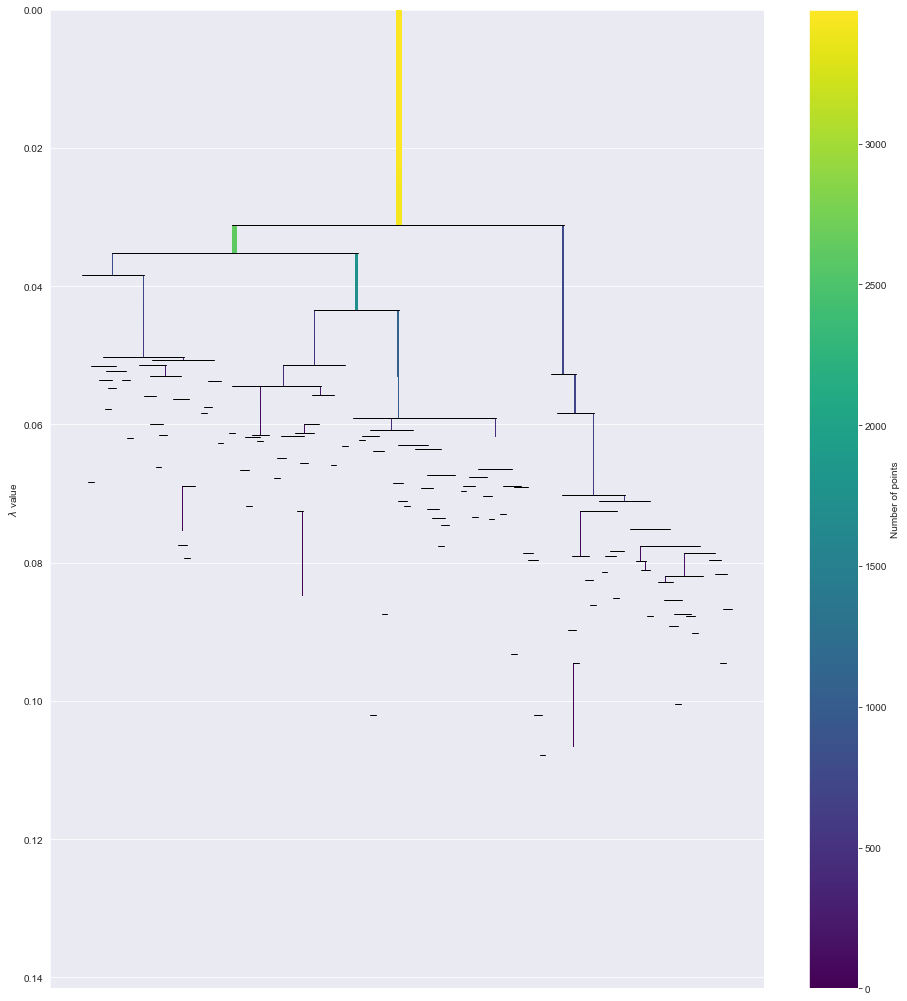

In [70]:
plt.figure(figsize = (16,18))
clusterer.condensed_tree_.plot()
plt.show()

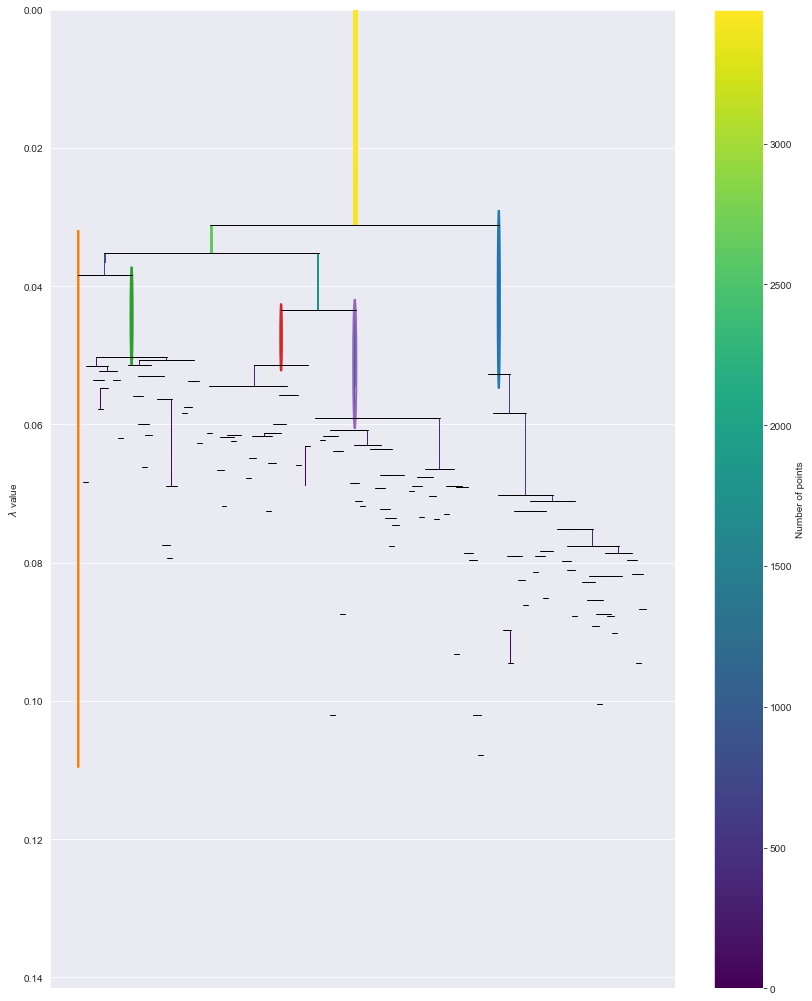

In [71]:
plt.figure(figsize = (14,18))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [72]:
clusterer.labels_

array([-1,  2,  0, ...,  2,  2,  2])

-1 is outlier, then we have cluster labels 0-4.

In [74]:
final_df_drop['cluster_id']=clusterer.labels_

In [75]:
#make dataframes for each cluster (and outliers separate)
outliers = final_df_drop[final_df_drop['cluster_id']==-1]
cluster_0 = final_df_drop[final_df_drop['cluster_id']==0]
cluster_1 = final_df_drop[final_df_drop['cluster_id']==1]
cluster_2 = final_df_drop[final_df_drop['cluster_id']==2]
cluster_3 = final_df_drop[final_df_drop['cluster_id']==3]
cluster_4 = final_df_drop[final_df_drop['cluster_id']==4]

In [79]:
#how many values in each cluster?
final_df_drop['cluster_id'].value_counts()
    

 4    1110
 0     776
 2     753
 3     578
-1     225
 1      33
Name: cluster_id, dtype: int64

In [82]:
print("Outliers:", outliers.value_counts('yardlineNumber'))
print("Cluster_0:", cluster_0.value_counts('yardlineNumber'))
print("Cluster_1:", cluster_1.value_counts('yardlineNumber')) 
print("Cluster_2:", cluster_2.value_counts('yardlineNumber')) 
print("Cluster_3:", cluster_3.value_counts('yardlineNumber'))
print("Cluster_4:", cluster_4.value_counts('yardlineNumber')) 

Outliers: yardlineNumber
15    220
20      2
25      2
7       1
dtype: int64
Cluster_0: yardlineNumber
15    768
20      7
30      1
dtype: int64
Cluster_1: yardlineNumber
15    33
dtype: int64
Cluster_2: yardlineNumber
15    742
20      6
10      3
25      1
30      1
dtype: int64
Cluster_3: yardlineNumber
15    565
10      5
20      4
30      2
7       1
25      1
dtype: int64
Cluster_4: yardlineNumber
15    1097
20      10
25       2
30       1
dtype: int64


In [83]:
print("Outliers:", outliers.value_counts('specialTeamsResults'))
print("Cluster_0:", cluster_0.value_counts('specialTeamsResults'))
print("Cluster_1:", cluster_1.value_counts('specialTeamsResults')) 
print("Cluster_2:", cluster_2.value_counts('specialTeamsResults')) 
print("Cluster_3:", cluster_3.value_counts('specialTeamsResults'))
print("Cluster_4:", cluster_4.value_counts('specialTeamsResults')) 

Outliers: specialTeamsResults
1    211
2     12
0      2
dtype: int64
Cluster_0: specialTeamsResults
1    723
2     51
0      2
dtype: int64
Cluster_1: specialTeamsResults
1    30
2     2
0     1
dtype: int64
Cluster_2: specialTeamsResults
1    709
2     42
0      2
dtype: int64
Cluster_3: specialTeamsResults
1    545
2     29
0      4
dtype: int64
Cluster_4: specialTeamsResults
1    1034
2      63
0      13
dtype: int64


In [85]:
print("Outliers:", outliers.value_counts('kicker_height'))
print("Cluster_0:", cluster_0.value_counts('kicker_height'))
print("Cluster_1:", cluster_1.value_counts('kicker_height')) 
print("Cluster_2:", cluster_2.value_counts('kicker_height')) 
print("Cluster_3:", cluster_3.value_counts('kicker_height'))
print("Cluster_4:", cluster_4.value_counts('kicker_height')) 

Outliers: kicker_height
73.0    65
68.0    38
72.0    35
69.0    26
71.0    19
70.0    14
75.0    11
74.0    10
76.0     6
77.0     1
dtype: int64
Cluster_0: kicker_height
72.0    182
73.0    144
70.0    105
71.0     84
74.0     72
69.0     58
76.0     46
75.0     44
77.0     22
68.0     19
dtype: int64
Cluster_1: kicker_height
73.0    8
72.0    7
70.0    6
71.0    3
77.0    3
74.0    2
76.0    2
69.0    1
75.0    1
dtype: int64
Cluster_2: kicker_height
72.0    189
73.0    111
71.0     93
70.0     90
74.0     78
69.0     68
76.0     47
75.0     43
77.0     25
68.0      9
dtype: int64
Cluster_3: kicker_height
72.0    147
73.0    104
70.0     83
74.0     65
71.0     61
76.0     39
75.0     33
69.0     32
77.0     10
68.0      4
dtype: int64
Cluster_4: kicker_height
72.0    265
73.0    180
70.0    148
71.0    136
74.0    112
69.0     89
76.0     72
75.0     60
77.0     34
68.0     14
dtype: int64


In [86]:
print("Outliers:", outliers.value_counts('kicker_weight'))
print("Cluster_0:", cluster_0.value_counts('kicker_weight'))
print("Cluster_1:", cluster_1.value_counts('kicker_weight')) 
print("Cluster_2:", cluster_2.value_counts('kicker_weight')) 
print("Cluster_3:", cluster_3.value_counts('kicker_weight'))
print("Cluster_4:", cluster_4.value_counts('kicker_weight')) 

Outliers: kicker_weight
258.0    47
160.0    40
167.0    24
232.0    23
183.0    13
184.0     8
190.0     8
215.0     8
221.0     7
218.0     7
213.0     7
205.0     5
201.0     5
210.0     4
185.0     4
165.0     3
200.0     2
191.0     2
186.0     2
222.0     2
207.0     1
212.0     1
192.0     1
202.0     1
dtype: int64
Cluster_0: kicker_weight
190.0    105
183.0     68
215.0     60
201.0     54
205.0     44
185.0     44
210.0     40
202.0     34
207.0     33
191.0     32
184.0     26
203.0     25
186.0     24
192.0     19
212.0     18
218.0     18
213.0     16
232.0     15
200.0     14
167.0     14
160.0     13
195.0     12
221.0     12
214.0     11
222.0      9
187.0      6
165.0      3
197.0      3
178.0      3
182.0      1
dtype: int64
Cluster_1: kicker_weight
183.0    6
185.0    4
201.0    3
190.0    3
215.0    3
210.0    2
184.0    2
221.0    1
213.0    1
212.0    1
179.0    1
205.0    1
203.0    1
195.0    1
192.0    1
191.0    1
232.0    1
dtype: int64
Cluster_2: kicker_weig

In [88]:
print("Outliers:", outliers.value_counts('gameClockSeconds').sort_index())
print("Cluster_0:", cluster_0.value_counts('gameClockSeconds').sort_index())
print("Cluster_1:", cluster_1.value_counts('gameClockSeconds').sort_index()) 
print("Cluster_2:", cluster_2.value_counts('gameClockSeconds').sort_index()) 
print("Cluster_3:", cluster_3.value_counts('gameClockSeconds').sort_index())
print("Cluster_4:", cluster_4.value_counts('gameClockSeconds').sort_index()) 

Outliers: gameClockSeconds
85      2
222     1
270     1
369     1
415     1
       ..
3553    1
3557    1
3563    1
3594    1
3595    3
Length: 212, dtype: int64
Cluster_0: gameClockSeconds
0      8
2      1
3      1
4      2
5      1
      ..
843    1
844    1
846    1
848    1
851    1
Length: 499, dtype: int64
Cluster_1: gameClockSeconds
3583    1
3587    1
3589    2
3591    1
3592    6
3593    5
3594    5
3595    7
3596    2
3597    3
dtype: int64
Cluster_2: gameClockSeconds
2688    1
2689    1
2690    1
2691    1
2700    3
       ..
3562    2
3563    2
3564    1
3569    1
3570    1
Length: 496, dtype: int64
Cluster_3: gameClockSeconds
1894    2
1899    1
1900    1
1901    1
1902    2
       ..
2598    2
2601    2
2603    2
2607    1
2614    1
Length: 383, dtype: int64
Cluster_4: gameClockSeconds
883     1
886     1
888     1
889     1
900     3
       ..
1879    2
1880    2
1885    1
1888    1
1904    1
Length: 607, dtype: int64


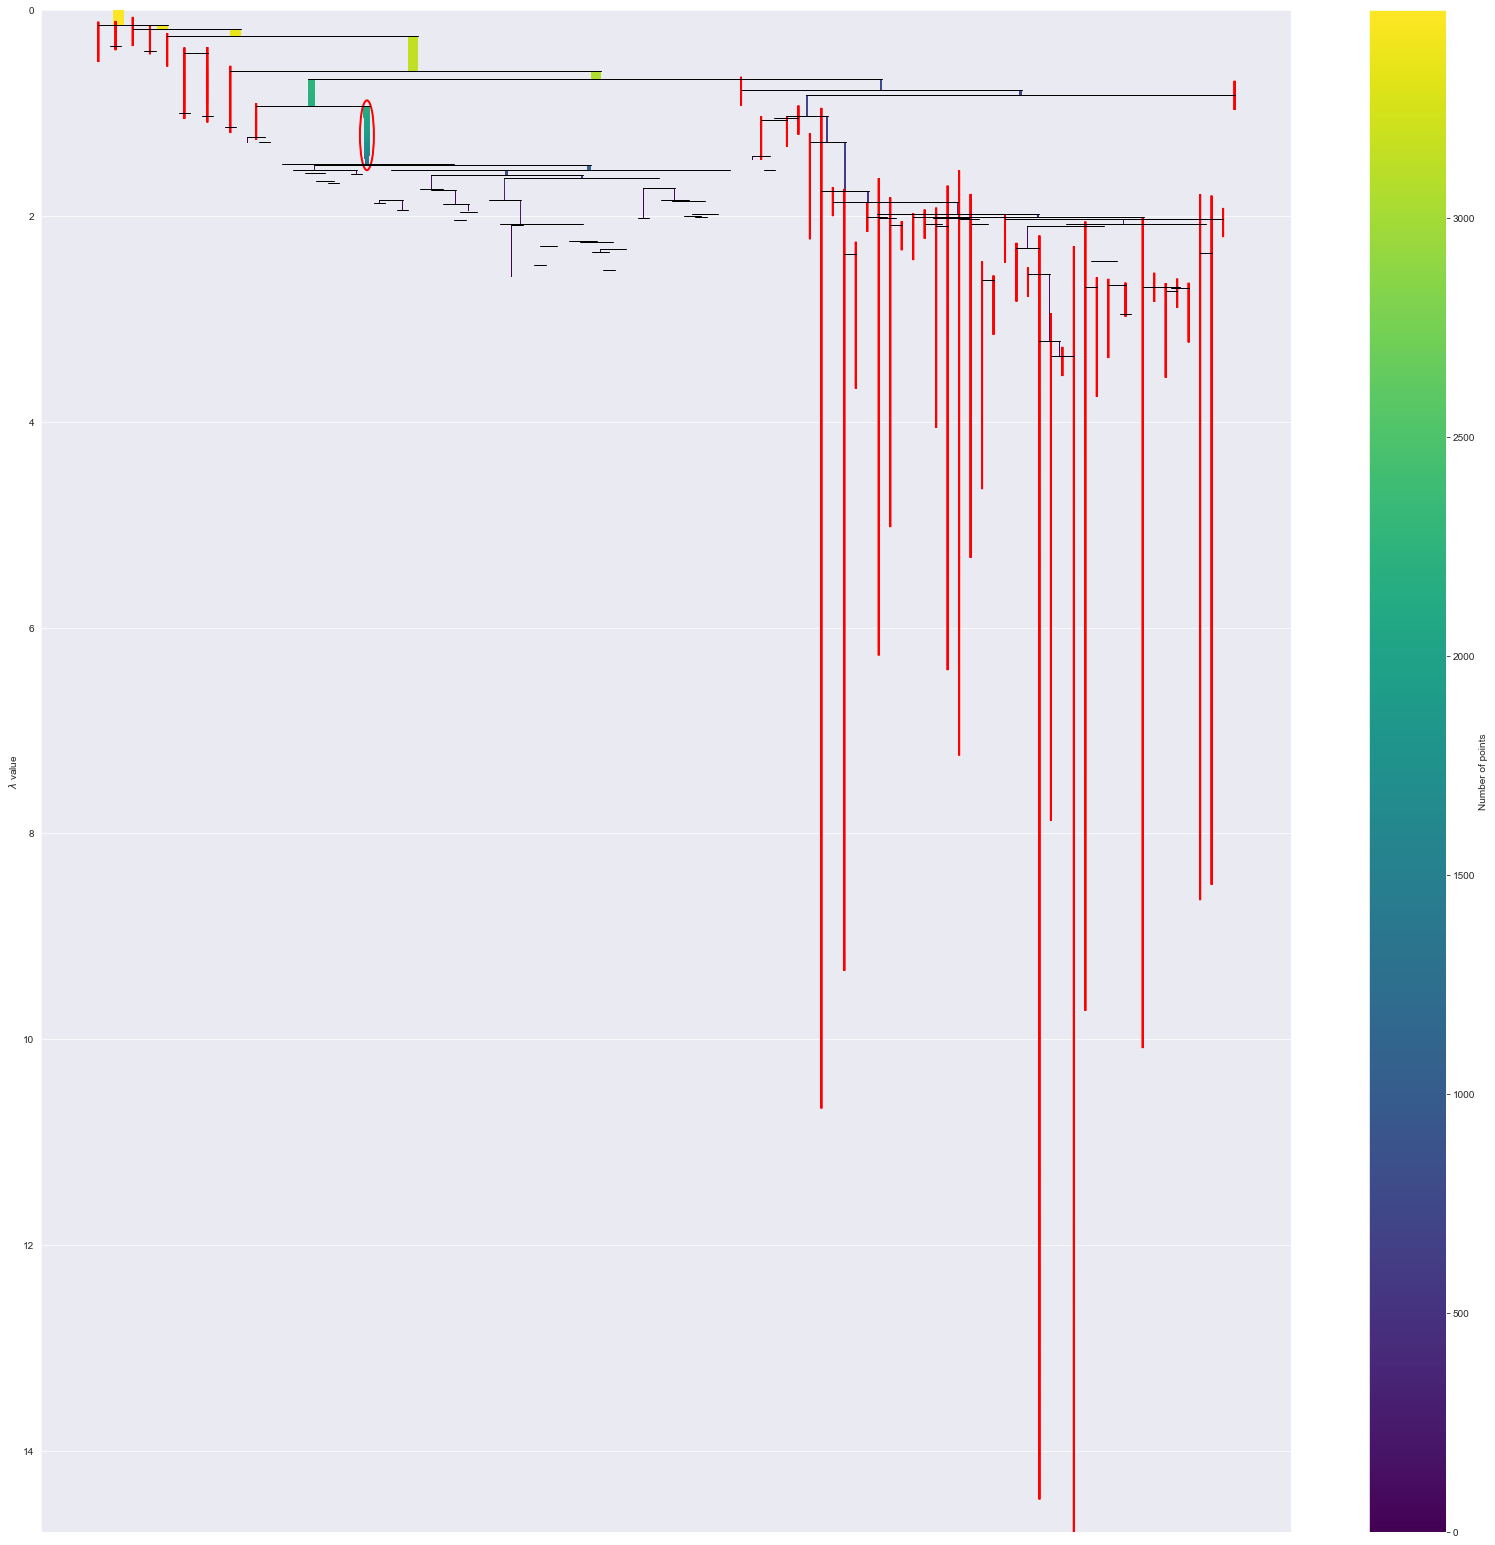

In [113]:
plt.figure(figsize = (28,28))
clusterer2.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()